In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir /root/.kaggle  

In [ ]:
!cp /content/drive/MyDrive/kaggle.json /root/.kaggle/kaggle.json

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!mkdir /content/drive/MyDrive/datasets

mkdir: cannot create directory ‘/content/drive/MyDrive/datasets’: File exists


In [ ]:
!kaggle datasets download moltean/fruits 

 99% 1.27G/1.28G [00:08<00:00, 167MB/s]
100% 1.28G/1.28G [00:08<00:00, 166MB/s]


In [ ]:
!unzip fruits -d /content/drive/MyDrive/datasets/fruits360


Archive:  fruits.zip
replace /content/drive/MyDrive/datasets/fruits360/fruits-360-original-size/fruits-360-original-size/Meta/apple_6/info.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls /content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360

LICENSE  papers  readme.md  Test  test-multiple_fruits	Training


In [ ]:
import tensorflow as tf
from collections import Counter
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50,  preprocess_input
from keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob
import itertools
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
os.listdir('/content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360/Training')

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado ripe',
 'Banana Lady Finger',
 'Banana Red',
 'Banana',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn Husk',
 'Corn',
 'Cucumber Ripe 2',
 'Cucumber Ripe',
 'Dates',
 'Eggplant',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grape White',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon Meyer',
 'Lemon',
 'Limes',
 'Lychee',
 'Mandarine',
 'Mango Red',
 'Mango'

In [ ]:
os.listdir('/content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360/Test')

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado ripe',
 'Banana Lady Finger',
 'Banana Red',
 'Banana',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn Husk',
 'Corn',
 'Cucumber Ripe 2',
 'Cucumber Ripe',
 'Dates',
 'Eggplant',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grape White',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon Meyer',
 'Lemon',
 'Limes',
 'Lychee',
 'Mandarine',
 'Mango Red',
 'Mango'

In [ ]:
#Setting Training & Test dir paths
train_path_initial = '/content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360/Training/' 

valid_path_initial = '/content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360/Test/'


In [ ]:
classes = []
fruit_item = []
for i in os.listdir(train_path_initial):
  for image_filename in os.listdir(train_path_initial+i):
    classes.append(i)
    fruit_item.append(i+'/'+ image_filename)

count = Counter(classes)
most_frequent = count.most_common(20)
print("Top 20 frequent Fruits:")
most_frequent

Top 20 frequent Fruits:


[('Grape Blue', 984),
 ('Plum 3', 900),
 ('Cherry Rainier', 738),
 ('Melon Piel de Sapo', 738),
 ('Peach 2', 738),
 ('Strawberry Wedge', 738),
 ('Pear Stone', 711),
 ('Cauliflower', 702),
 ('Pear Forelle', 702),
 ('Pepper Orange', 702),
 ('Pear 2', 696),
 ('Apple Red Yellow 2', 672),
 ('Pear Red', 666),
 ('Pepper Red', 666),
 ('Pepper Yellow', 666),
 ('Nut Forest', 654),
 ('Nut Pecan', 534),
 ('Pineapple Mini', 493),
 ('Apple Braeburn', 492),
 ('Apple Golden 2', 492)]

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [100, 100]

# training config:
epochs = 10
batch_size = 32

In [ ]:
train_path = '/content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360/Training/Training2/' 
valid_path = '/content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360/Test/Test2/'

In [ ]:
os.listdir('/content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360/Training/Training2')

['Avocado', 'Cherry 2', 'Fig', 'Tomato 1', 'Tomato 2']

In [ ]:
os.listdir('/content/drive/MyDrive/datasets/fruits360/fruits-360_dataset/fruits-360/Test/Test2')

['Avocado', 'Cherry 2', 'Fig', 'Tomato 1', 'Tomato 2']

In [ ]:
# useful for getting number of files
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

In [ ]:
folders = glob(train_path + '/*')

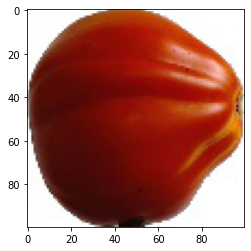

In [ ]:
# look at an image for fun
plt.imshow(image.load_img(np.random.choice(image_files)));

In [ ]:
# Data Augmentation of ImageDataGenerator
train_gen = ImageDataGenerator(
  rotation_range= 40,
  width_shift_range=0.5,
  height_shift_range=0.1,
  shear_range=0.2,
  zoom_range=0.1,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input)

val_gen = ImageDataGenerator(
  preprocessing_function=preprocess_input
)

In [ ]:
# create iterators
train_generator = train_gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
  class_mode='sparse',
)
valid_generator = val_gen.flow_from_directory(
  valid_path,
  target_size=IMAGE_SIZE,
  shuffle=False,
  batch_size=batch_size,
  class_mode='sparse',
)

Found 3211 images belonging to 5 classes.
Found 1094 images belonging to 5 classes.


In [ ]:
pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(100, 100, 3),
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

model = tf.keras.models.Sequential([    
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(5,activation='softmax')
])
model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 64)                294976    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 15,009,989
Trainable params: 295,301
Non-trainable params: 14,714,688
_______________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs['accuracy']>=0.99):
      self.model.stop_training=True

callbacks=myCallback()

# fitting the model
hist = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
  callbacks = [callbacks],
)

Epoch 1/10
100/100 [==============================] - 842s 8s/step - loss: 1.2038 - accuracy: 0.8679 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 2/10
100/100 [==============================] - 439s 4s/step - loss: 0.1875 - accuracy: 0.9560 - val_loss: 5.5215e-04 - val_accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 438s 4s/step - loss: 0.0966 - accuracy: 0.9685 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 440s 4s/step - loss: 0.0933 - accuracy: 0.9748 - val_loss: 1.8440e-07 - val_accuracy: 1.0000
Epoch 5/10
100/100 [==============================] - 439s 4s/step - loss: 0.0625 - accuracy: 0.9821 - val_loss: 4.8710e-04 - val_accuracy: 1.0000
Epoch 6/10
100/100 [==============================] - 440s 4s/step - loss: 0.0745 - accuracy: 0.9821 - val_loss: 1.1074e-04 - val_accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 447s 4s/step - loss: 0.0574 - accuracy: 0.9849 - val_loss: 4.2705e-05 - 

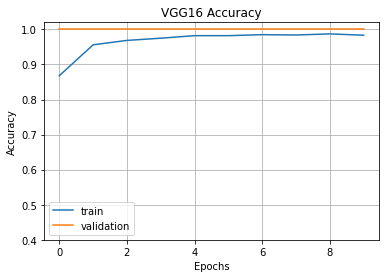

In [ ]:
#accuracy plot
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='val accuracy')
plt.axis(ymin=0.4,ymax=1.02)
plt.grid()
plt.title('VGG16 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


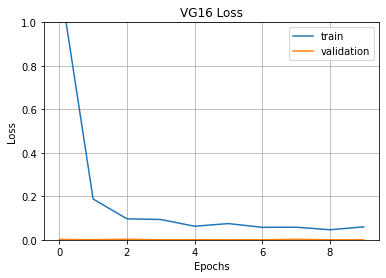

In [ ]:
# loss plot
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('VG16 Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.save('fruits-360_dataset/fruits-360')

In [ ]:
model.evaluate(valid_generator)

35/35 [==============================] - 109s 3s/step - loss: 8.4804e-05 - accuracy: 1.0000


[8.480371616315097e-05, 1.0]

In [ ]:
from tensorflow import keras
model = keras.models.load_model('fruits-360_dataset/fruits-360')